In [1]:
#импортируем пакеты
import pandas as pd
import numpy as np
import csv
import cx_Oracle

import matplotlib.pyplot as plt
import math
import scipy.stats as ss
import seaborn as sns

In [2]:
#читаем данные с csv, кодировка обязательно нужна тк присутствует латинница
df = pd.read_csv("C:\Jypiter\Glob_terror.csv", encoding='latin1', error_bad_lines = False, warn_bad_lines = False, low_memory=False)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
#создаем набор из указанных полей
features = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'latitude', 'longitude']
df = df.loc[:,features]
df = df.dropna().reset_index(drop=True) #убираем строки с пустыми данными
df = df.loc[(df['iyear'].isin(list(range(0, 2019)))) & (df['imonth'].isin(list(range(1, 12)))) & (df['iday'].isin(list(range(1, 31))))]

#добавляем новый столбец, склеиный из других
df.loc[:,'accident_date'] = df.astype('str').loc[:,'iyear'] + df.astype('str').loc[:,'imonth'] + df.astype('str').loc[:,'iday']
df


,iyear,imonth,iday,country_txt,region_txt,latitude,longitude,accident_date
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,197072
5,1970,1,1,United States,North America,37.005105,-89.176269,197011
6,1970,1,2,Uruguay,South America,-34.891151,-56.187214,197012
7,1970,1,2,United States,North America,37.791927,-122.225906,197012
8,1970,1,2,United States,North America,43.076592,-89.412488,197012
9,1970,1,3,United States,North America,43.072950,-89.386694,197013
10,1970,1,1,United States,North America,43.468500,-89.744299,197011
11,1970,1,6,United States,North America,39.758968,-104.876305,197016
12,1970,1,8,Italy,Western Europe,41.890961,12.490069,197018
13,1970,1,9,United States,North America,42.331685,-83.047924,197019


In [4]:
#мутим БД. Создаем соединение
con2 = cx_Oracle.connect('SYSTEM/legomania97@//localhost:1521/xe') # логин/пароль@сервер:порт/база данных

#create

def create(con2):
    cur = con2.cursor() #делаем курсор который будет по execute передавать statement в БД
    statement = 'CREATE TABLE podft (iyear varchar2 (20 char),imonth varchar2 (20 char),iday varchar2 (20 char),country_txt varchar2 (200 char),region_txt varchar2 (200 char),latitude varchar2 (20 char),longitude varchar2 (20 char),accident_date varchar2 (20 char))'
    cur.execute(statement)
    con2.commit()

#insert

def insert(con2):
    cur = con2.cursor() #почти
    statement = 'insert into podft values (:2, :3, :4, :5, :6, :7, :8, :9)'
    for index, row in df.iterrows():
        cur.execute(statement, (row['iyear'],row['imonth'],row['iday'],row['country_txt'],row['region_txt'],row['latitude'],row['longitude'],row['accident_date']))
    con2.commit()

#select

def select(con2):
    cur = con2.cursor() #еще выще
    statement = 'SELECT * FROM podft'
    dt = cur.execute(statement)
    for res in dt:
        print(res)
    data = cur.fetchall()
    print(data)
    con2.commit()

#drop
def drop(con2):
    cur = con2.cursor() #смотрите выше про курсор
    statement = 'DROP TABLE podft'
    cur.execute(statement)
    con2.commit()
    
#create(con2)
#insert(con2)
#select(con2)
#drop(con2)

con2.close()

In [5]:
#создаем таблицу частот общего кол-ва терактов от страны
freq = df[['country_txt','latitude']].groupby(['country_txt']).count() #таблица частот
freq = pd.DataFrame(freq.sort_values(by='latitude', ascending=True)) #сортируем по возрастанию и делаем фрейм

val = freq.drop_duplicates() #создаем фрейм без дупликатов (понадобится в дальнейшем)
mean_val = int(val.mean(axis = 0)) #среднее значение в фрейме уникальных значений
var_val = int((val.max(axis = 0)-val.min(axis = 0))*0.1) #вариация в фрейме уникальных значений

countries = [] #список, куда мы будем скидывать страны которые удалим после выполнения всех 3 условий

'''
Итог:
freq - фрейм страны и ее число террактов
val - фрейм уникальных значений, не обращаем внимания на названия строк
countries - список стран
'''

'\nИтог:\nfreq - фрейм страны и ее число террактов\nval - фрейм уникальных значений, не обращаем внимания на названия строк\ncountries - список стран\n'

In [6]:
# условие 1: с величиной которая стоит в первых и последних 10% 
min_i = int(val.shape[0]*0.1) #находим в таблице уникальных значений значение равное 10% от всех
max_i = int(val.shape[0]*0.9) #то же, только 90%
df21 = freq.iloc[:min_i,:] #фрейм со значениями ниже 10% границы
df22 = freq.iloc[max_i:,:] #фрейм со значениями выше 90% границы

countries = list(df21.index.values) + list(df22.index.values)

'''
Итог:
val - фрейм уникальных значений, не обращаем внимания на названия строк
countries - список стран
df11 - фрейм со значениями ниже 10% границы
df22 - фрейм со значениями выше 90% границы
'''

'\nИтог:\nval - фрейм уникальных значений, не обращаем внимания на названия строк\ncountries - список стран\ndf11 - фрейм со значениями ниже 10% границы\ndf22 - фрейм со значениями выше 90% границы\n'

In [7]:
#я сделал копию val, но думаю если найду время то сделаю так, чтобы не было необходимости кучу фреймов создавать

val2 = val.copy() #копируем данные
val2['prev_val'] = val2['latitude'] #добавляем столбец куда вставим соседнюю по порядку следования к центру

'''
Итог:
val - фрейм уникальных значений, не обращаем внимания на названия строк
val2 - полная копия
'''

val2

,latitude,prev_val
country_txt,,
St. Kitts and Nevis,1,1
Turkmenistan,2,2
People's Republic of the Congo,3,3
Montenegro,4,4
Bahamas,5,5
Slovenia,6,6
Gabon,7,7
East Timor,8,8
Guinea-Bissau,9,9


In [8]:
val21 = val2.loc[val2['latitude'] < mean_val].copy() #еще один фрейм :) в него войдут те страны у которых кол-во террактов ниже среднего
for i in range(0, len(val21)-1):
    val21.iloc[i, 1] = val21.iloc[i+1, 0] #проходим по каждой строке и ставим соседнее значение во вторую колонку
    
val22 = val2.loc[val2['latitude'] > mean_val].copy() #фрейм с террактами выше среднего
for i in range(1, len(val22)):
    val22.iloc[i, 1] = val22.iloc[i-1, 0] #проходим по каждой строке и ставим соседнее значение во вторую колонку

val2 = val21.append(val22) #объединяем два фрейма в один
newlist = list(val2.loc[abs(val2['latitude']-val2['prev_val']) > var_val].index.values) #берем страны с разбросом больще 10%
countries = countries + newlist #добавляем страны в список

'''
Итог:
val2 - копия val
val21 - фрейм стран до середины
val22 - фрейм стран от середины
'''

val22

,latitude,prev_val
country_txt,,
Italy,1370,1370
Bangladesh,1408,1370
Nicaragua,1412,1408
Ukraine,1602,1412
Guatemala,1751,1602
South Africa,1755,1751
Israel,1964,1755
West Bank and Gaza Strip,1995,1964
Syria,1997,1995


In [9]:
#условие 3:
newlist = list(freq[(freq['latitude'] < 5)].index.values) #берем страны у которых террактов меньше 5
newlist
countries = countries + newlist #добавляем страны в список

'''
Итог:
newlist - фрейм стран со значениями меньше 5
countries - список стран на удаление
'''

'\nИтог:\nnewlist - фрейм стран со значениями меньше 5\ncountries - список стран на удаление\n'

In [10]:
df2 = df.loc[~df['country_txt'].isin(list(set(countries)))] #берем только те страны, которые НЕ в списке countries
df2

,iyear,imonth,iday,country_txt,region_txt,latitude,longitude,accident_date
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,197072
6,1970,1,2,Uruguay,South America,-34.891151,-56.187214,197012
15,1970,1,10,East Germany (GDR),Eastern Europe,52.501530,13.401851,1970110
20,1970,1,15,Uruguay,South America,-34.891151,-56.187214,1970115
33,1970,1,28,East Germany (GDR),Eastern Europe,52.501530,13.401851,1970128
79,1970,2,21,Switzerland,Western Europe,47.368650,8.539182,1970221
94,1970,2,28,Jordan,Middle East & North Africa,31.530243,35.094162,1970228
148,1970,3,24,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,1970324
191,1970,4,15,Jordan,Middle East & North Africa,31.950001,35.933331,1970415
236,1970,4,28,East Germany (GDR),Eastern Europe,52.501530,13.401851,1970428


In [11]:
#данные для графика
graf = df2[['imonth','latitude']].groupby(['imonth']).count() #таблица частот
graf['x'] = list(range(1,len(graf)+1)) #ставим x
graf

,latitude,x
imonth,,
1,307,1
2,311,2
3,318,3
4,340,4
5,354,5
6,326,6
7,352,7
8,354,8
9,359,9


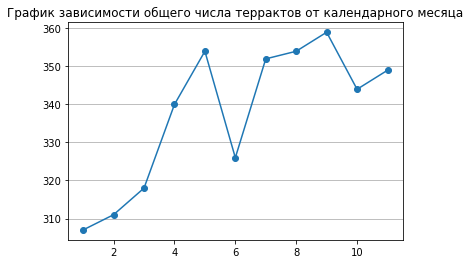

In [12]:
#делаем график
plt.plot(graf['x'], graf['latitude'], marker='o')
ax = plt.gca()
plt.title('График зависимости общего числа террактов от календарного месяца')
plt.grid(axis='y')
plt.show()

In [13]:
#коэффициент корреляции Пирсона
np.corrcoef(graf['x'], graf['latitude'])
'''
если близко к 0 - слабая корреляция
если близко к 1 - сильная корреляция
если положительно - положительная корреляция
если отрицательная - отрицательная, очевидно
'''

'\nесли близко к 0 - слабая корреляция\nесли близко к 1 - сильная корреляция\nесли положительно - положительная корреляция\nесли отрицательная - отрицательная, очевидно\n'

In [14]:
#коэффициент корреляции Пирсона
np.corrcoef(graf['x'], graf['latitude'])

array([[1.        , 0.78655199],
       [0.78655199, 1.        ]])